#### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt

#### Import the dataset

In [2]:
customer = pd.read_csv('Customer.csv')
transactions = pd.read_csv('Transactions.csv')
prod_cat = pd.read_csv('prod_cat_info.csv')

####  1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
#Merging Files
c1 = pd.merge(left = transactions, right = customer , how = 'inner', left_on= 'cust_id' , right_on = 'customer_Id' )
c1.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0


#### Q1 Final Dataframe

In [4]:
Customer_Final = pd.merge(left = c1 , right = prod_cat, how = 'inner', left_on = ['prod_cat_code','prod_subcat_code'] ,
                          right_on= ['prod_cat_code','prod_sub_cat_code'])
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women


In [5]:
#Since A few columns like CustID, prod subcat code are repeated we drop them
Customer_Final.drop(['cust_id','prod_subcat_code'],inplace = True, axis = 1)

####  2. Prepare a summary report for the merged data set.

#### a. Get the column names and their corresponding data types

In [6]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   tran_date          23053 non-null  object 
 2   prod_cat_code      23053 non-null  int64  
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   customer_Id        23053 non-null  int64  
 9   DOB                23053 non-null  object 
 10  Gender             23044 non-null  object 
 11  city_code          23045 non-null  float64
 12  prod_cat           23053 non-null  object 
 13  prod_sub_cat_code  23053 non-null  int64  
 14  prod_subcat        23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [7]:
# WE convert Transaction ID, prod_cat_code, customer_Id, prod_sub_cat_code, city_code to Object Type as they are not needed for Continous Variable
Customer_Final[['transaction_id', 'prod_cat_code', 'customer_Id', 'prod_sub_cat_code','city_code']] = Customer_Final[['transaction_id',
                'prod_cat_code', 'customer_Id', 'prod_sub_cat_code','city_code']].astype(object)
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  object 
 1   tran_date          23053 non-null  object 
 2   prod_cat_code      23053 non-null  object 
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   customer_Id        23053 non-null  object 
 9   DOB                23053 non-null  object 
 10  Gender             23044 non-null  object 
 11  city_code          23045 non-null  object 
 12  prod_cat           23053 non-null  object 
 13  prod_sub_cat_code  23053 non-null  object 
 14  prod_subcat        23053 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 2.8+ MB


In [8]:
#Converting DOB , tran_date to Date time Format
Customer_Final.DOB = pd.to_datetime(Customer_Final.DOB, format = '%d-%m-%Y')
Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
Customer_Final.tran_date

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '20-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '16-12-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '16-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '27-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '23-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '17-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '23-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '18-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '20-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '17-05-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Customer_Final.tran_date = pd.to_datetime(Customer_Final.tran_date)
C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\948370616.py:3: UserWarning: Parsing '22-03-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent

0       2014-02-28
1       2014-02-20
2       2013-12-16
3       2013-08-16
4       2013-07-08
           ...    
23048   2011-09-04
23049   2011-03-03
23050   2011-02-23
23051   2011-02-18
23052   2011-01-26
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [9]:
#We have Missing Values in Gender and City_code Variables we can drop them
Customer_Final.dropna(axis = 0, inplace= True)
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23036 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     23036 non-null  object        
 1   tran_date          23036 non-null  datetime64[ns]
 2   prod_cat_code      23036 non-null  object        
 3   Qty                23036 non-null  int64         
 4   Rate               23036 non-null  int64         
 5   Tax                23036 non-null  float64       
 6   total_amt          23036 non-null  float64       
 7   Store_type         23036 non-null  object        
 8   customer_Id        23036 non-null  object        
 9   DOB                23036 non-null  datetime64[ns]
 10  Gender             23036 non-null  object        
 11  city_code          23036 non-null  object        
 12  prod_cat           23036 non-null  object        
 13  prod_sub_cat_code  23036 non-null  object        
 14  prod_s

#### b. Top/Bottom 10 observations

In [10]:
#b Top Bottom observations
Customer_Final.head(10)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,80712190438,2014-02-20,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,18505840838,2013-12-16,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
3,92814475704,2013-08-16,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
4,92814475704,2013-07-08,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
5,4737317330,2011-07-29,1,5,1141,599.025,6304.025,MBR,269345,1970-06-26,F,10.0,Clothing,1,Women
6,44425889101,2012-03-18,1,4,897,376.740,3964.740,Flagship store,274987,1983-10-08,M,2.0,Clothing,1,Women
7,90501340928,2012-02-19,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,1,Women
8,99335419136,2012-12-13,1,3,1181,372.015,3915.015,e-Shop,268755,1984-07-15,F,8.0,Clothing,1,Women
9,35030444164,2011-11-18,1,5,1047,549.675,5784.675,MBR,268129,1982-08-07,F,9.0,Clothing,1,Women


In [11]:
# Bottom Rows
Customer_Final.tail(10)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,3387244829,2011-07-15,4,1,388,40.740,428.740,e-Shop,269114,1989-01-22,F,5.0,Bags,4,Women
23044,76906459516,2011-06-15,4,2,1263,265.230,2791.230,Flagship store,267940,1979-06-09,M,9.0,Bags,4,Women
23045,73549617163,2011-05-07,4,5,263,138.075,1453.075,e-Shop,271334,1983-12-08,F,10.0,Bags,4,Women
23046,75339646315,2011-02-05,4,4,1381,580.020,6104.020,e-Shop,274827,1988-12-27,F,8.0,Bags,4,Women
23047,6650926717,2011-05-04,4,4,1036,435.120,4579.120,MBR,268110,1976-03-06,M,2.0,Bags,4,Women
23048,7173864364,2011-09-04,4,5,788,413.700,4353.700,Flagship store,271157,1973-10-15,F,6.0,Bags,4,Women
23049,5618131425,2011-03-03,4,2,1150,241.500,2541.500,MBR,272010,1972-12-22,F,5.0,Bags,4,Women
23050,18727956164,2011-02-23,4,5,668,350.700,3690.700,e-Shop,267161,1981-05-08,M,9.0,Bags,4,Women
23051,60416814232,2011-02-18,4,4,202,84.840,892.840,Flagship store,273281,1988-12-14,F,9.0,Bags,4,Women
23052,83245680995,2011-01-26,4,4,1477,620.340,6528.340,e-Shop,273723,1984-01-21,F,4.0,Bags,4,Women


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [12]:
def func(x):
    return pd.Series([x.min(), x.max(), x.median(), x.quantile(0.25), x.quantile(0.75)],
                     index = ['Min','Max','Median','Q1','Q3'])
Cont_data = Customer_Final.select_dtypes(['int64','float64'])
Cont_data.apply(func)

,Qty,Rate,Tax,total_amt
Min,-5.0,-1499.0,7.3500,-8270.925
Max,5.0,1500.0,787.5000,8287.500
Median,3.0,710.0,199.0800,1754.740
Q1,1.0,312.0,98.2800,762.450
Q3,4.0,1109.0,365.7675,3569.150


#### d. Frequency tables for all the categorical variables

In [13]:
cat_data = Customer_Final[['Store_type','prod_cat','prod_subcat','Gender']]
cat_data.nunique()

Store_type      4
prod_cat        6
prod_subcat    18
Gender          2
dtype: int64

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

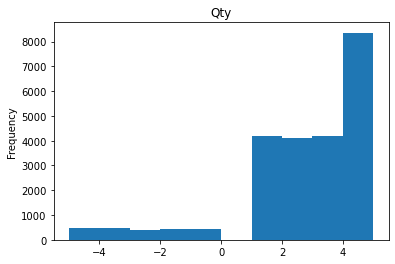

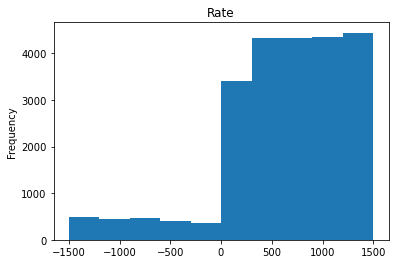

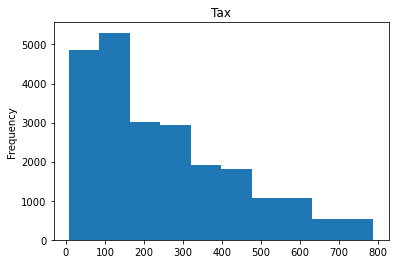

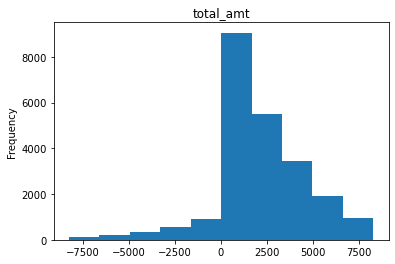

In [14]:
# Histograms
for i in Cont_data.columns:
    Cont_data[i].plot(kind = 'hist')
    plt.title(i)
    plt.show()

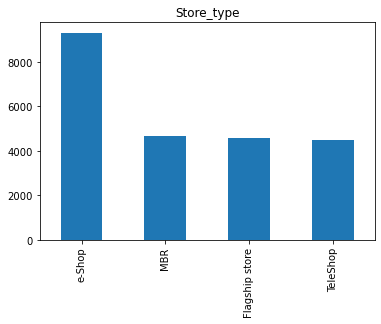

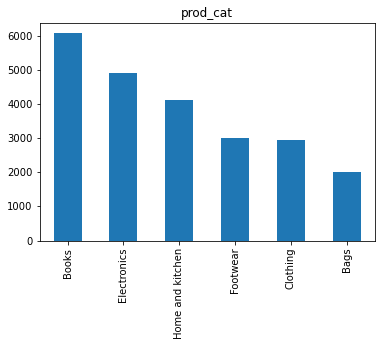

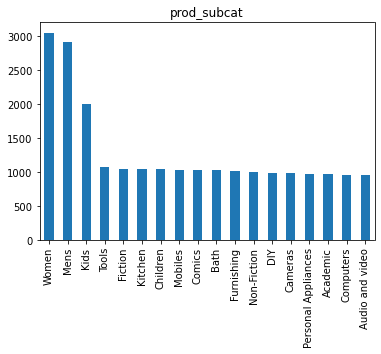

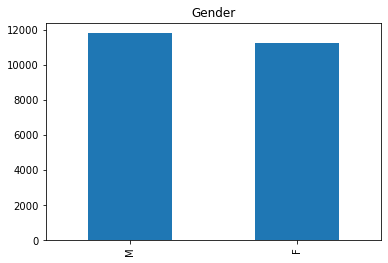

In [15]:
# Frequency Bars
for r in cat_data.columns:
    cat_data[r].value_counts().plot(kind = 'bar')
    plt.title(r)
    plt.show()

#### 4. Calculate the following information using the merged dataset :


#### a. Time period of the available transaction data

In [16]:
Customer_Final.tran_date.max() - Customer_Final.tran_date.min()

Timedelta('1430 days 00:00:00')

#### b. Count of transactions where the total amount of transaction was negative

In [17]:
Customer_Final[Customer_Final.total_amt < 0].shape[0]

2176

#### 5. Analyze which product categories are more popular among females vs male customers.

In [18]:
#Popular Category Among Males
p1 = Customer_Final[Customer_Final.Gender == 'M'].groupby('prod_cat').Qty.count().sort_values(ascending = False)
print('Popular Categories Among Males : \n', p1[0:3])

Popular Categories Among Males : 
 prod_cat
Books               3115
Electronics         2568
Home and kitchen    2132
Name: Qty, dtype: int64


In [19]:
#Popular Category Among Females
p1 = Customer_Final[Customer_Final.Gender == 'F'].groupby('prod_cat').Qty.count().sort_values(ascending = False)
print('Popular Categories Among Females : \n', p1[0:3])

Popular Categories Among Females : 
 prod_cat
Books               2949
Electronics         2326
Home and kitchen    1994
Name: Qty, dtype: int64


#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [20]:
c2 = Customer_Final.drop_duplicates(['city_code','customer_Id'])
c3 = c2.groupby('city_code').customer_Id.count().sort_values(ascending = False)
print('Max Customer are from City \n',c3.iloc[0:1])

Max Customer are from City 
 city_code
3.0    576
Name: customer_Id, dtype: int64


In [21]:
print('Percentage of Customers From City with Max Customers = ',((c3.iloc[0]/c3.sum())*100).round(2))

Percentage of Customers From City with Max Customers =  10.47


#### 7. Which store type sells the maximum products by value and by quantity?

In [22]:
print('Store that Sells Max Products by Quantity \n',Customer_Final[(Customer_Final.total_amt>0) & 
    (Customer_Final.Qty>0)].groupby('Store_type').Qty.sum().sort_values(ascending = False).head(1))

Store that Sells Max Products by Quantity 
 Store_type
e-Shop    25426
Name: Qty, dtype: int64


In [23]:
print('Store that Sells Max Products by Quantity \n',Customer_Final[(Customer_Final.total_amt>0) & 
    (Customer_Final.Qty>0)].groupby('Store_type').total_amt.sum().sort_values(ascending = False).head(1))

Store that Sells Max Products by Quantity 
 Store_type
e-Shop    22180313.61
Name: total_amt, dtype: float64


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [24]:
print('Total Amount Earned From Flagship Stores from Electronics and CLothing Categories \n',
Customer_Final[(Customer_Final.Store_type == 'Flagship store') & 
 (Customer_Final.prod_cat.isin(['Clothing',
            'Electronics']))].total_amt.sum())

Total Amount Earned From Flagship Stores from Electronics and CLothing Categories 
 3408936.05


#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [25]:
print('Total Amount Earned From Male Customers from Electronics Category\n',
Customer_Final[(Customer_Final.Gender == 'M') & 
 (Customer_Final.prod_cat == 'Electronics')].total_amt.sum())

Total Amount Earned From Male Customers from Electronics Category
 5697629.73


#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [26]:
print('Customers Have More than 10 Unique Transactions\n',
      Customer_Final[Customer_Final.total_amt> 0].customer_Id.value_counts().sort_values(ascending = False).head(10))

Customers Have More than 10 Unique Transactions
 266794    11
274227    11
270803    11
270535    11
272741    11
273014    11
269449    10
272415    10
274854    10
275252    10
Name: customer_Id, dtype: int64


#### 11. For all customers aged between 25 - 35, find out:

#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [27]:
Customer_Final.head()

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,80712190438,2014-02-20,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
2,18505840838,2013-12-16,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women
3,92814475704,2013-08-16,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women
4,92814475704,2013-07-08,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women


In [28]:
#Calculating Age Column
Customer_Final["age"] = Customer_Final["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))
Customer_Final.head()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_4796\1575745787.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  Customer_Final["age"] = Customer_Final["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))


,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,age
0,80712190438,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,41
1,80712190438,2014-02-20,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women,41
2,18505840838,2013-12-16,1,3,1229,387.135,4074.135,Flagship store,271509,1981-06-08,M,3.0,Clothing,1,Women,41
3,92814475704,2013-08-16,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women,36
4,92814475704,2013-07-08,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,1,Women,36


In [29]:
# 1 total amount spent for “Electronics” and “Books” product categories
print('Total Amount Spent for “Electronics” and “Books” product categories\n',
      Customer_Final[(Customer_Final.age.between(25,35))&
                     (Customer_Final.prod_cat.isin(['Electronics','Books']))].total_amt.sum())

Total Amount Spent for “Electronics” and “Books” product categories
 6058003.38


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [30]:
start  = pd.to_datetime('2014-1-1')
end = pd.to_datetime('2014-03-01')
print('Total amount spent by customers between 1st Jan, 2014 to 1st Mar, 2014 \n',
      Customer_Final[(Customer_Final.age.between(25,35))&
                     (Customer_Final.tran_date.between(start,end))].total_amt.sum())

Total amount spent by customers between 1st Jan, 2014 to 1st Mar, 2014 
 428230.595
